In [6]:
# Install libraries
!pip install tifffile numpy matplotlib Pillow ipywidgets

import tifffile as tiff
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
import os
import random

**To examine the size and structure of the input 5D data.**
Note that the sample file 'mitosis.tif' used here is in the format of **(t, z, c, x, y)**. Please adjust the code accordingly if you are working with data of a different structure.

In [7]:
def process_tiff(file_path, resize_dim):
    try:
        img = tiff.imread(file_path)  # Read the TIFF file

        print("Input shape:", img.shape) # Print the shape of the image for debugging

        # Check if the image has 5 dimensions
        if len(img.shape) != 5:
            print("Error: The TIFF file does not have 5 dimensions (XYZCT)")
            return
    except Exception as e:
        print("An error occurred:", e)

file_path = "/content/mitosis.tif"
resize_dim = [128,128]
process_tiff(file_path, resize_dim)

Input shape: (51, 5, 2, 196, 171)


The main process begins here: **the 5D data is converted into 2D images**, which are then stored in a folder named 'frame'.

Note: Ensure you first enter the path to your 5D image in the prompted blank space.
Note: Make sure the new size (x,y) is smaller than the size of the original input image.
Example setting could be like:
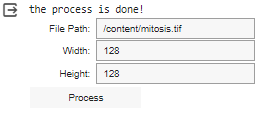

In [13]:
# Function to read and process the TIFF file
def process_tiff(file_path, resize_dim):

    img = tiff.imread(file_path)   # Read the TIFF file

    # Ensure the 'frames' directory exists
    os.makedirs('frames', exist_ok=True)

    # Process each time frame
    for t in range(img.shape[0]):
        # Composite image for each channel
        composite_image = None

        for c in range(img.shape[2]):
            # Project the Z-axis into XY
            projection = np.max(img[t, :, c, :, :], axis=0)

            # Normalize the projection for visualization
            projection = (projection / np.max(projection) * 255).astype(np.uint8)

            if composite_image is None:
                composite_image = Image.fromarray(projection)
            else:
                # Merge with previous channels
                composite_image = Image.blend(composite_image, Image.fromarray(projection), 0.5)

        # Resize the image
        composite_image = composite_image.resize(resize_dim)

        # Save the image
        composite_image.save(f'frames/frame_{t}.png')

#print("the process is done!")
# Interactive interface
file_path_widget = widgets.Text(description='File Path:')
resize_width_widget = widgets.IntText(value=512, description='Width:')
resize_height_widget = widgets.IntText(value=512, description='Height:')
button = widgets.Button(description='Process')

# Button click event
def on_button_clicked(b):
    process_tiff(file_path_widget.value, (resize_width_widget.value, resize_height_widget.value))

button.on_click(on_button_clicked)

# Display widgets
display(file_path_widget, resize_width_widget, resize_height_widget, button)



Text(value='', description='File Path:')

IntText(value=512, description='Width:')

IntText(value=512, description='Height:')

Button(description='Process', style=ButtonStyle())

To randonly visualize 6 output images from the folder 'frame'

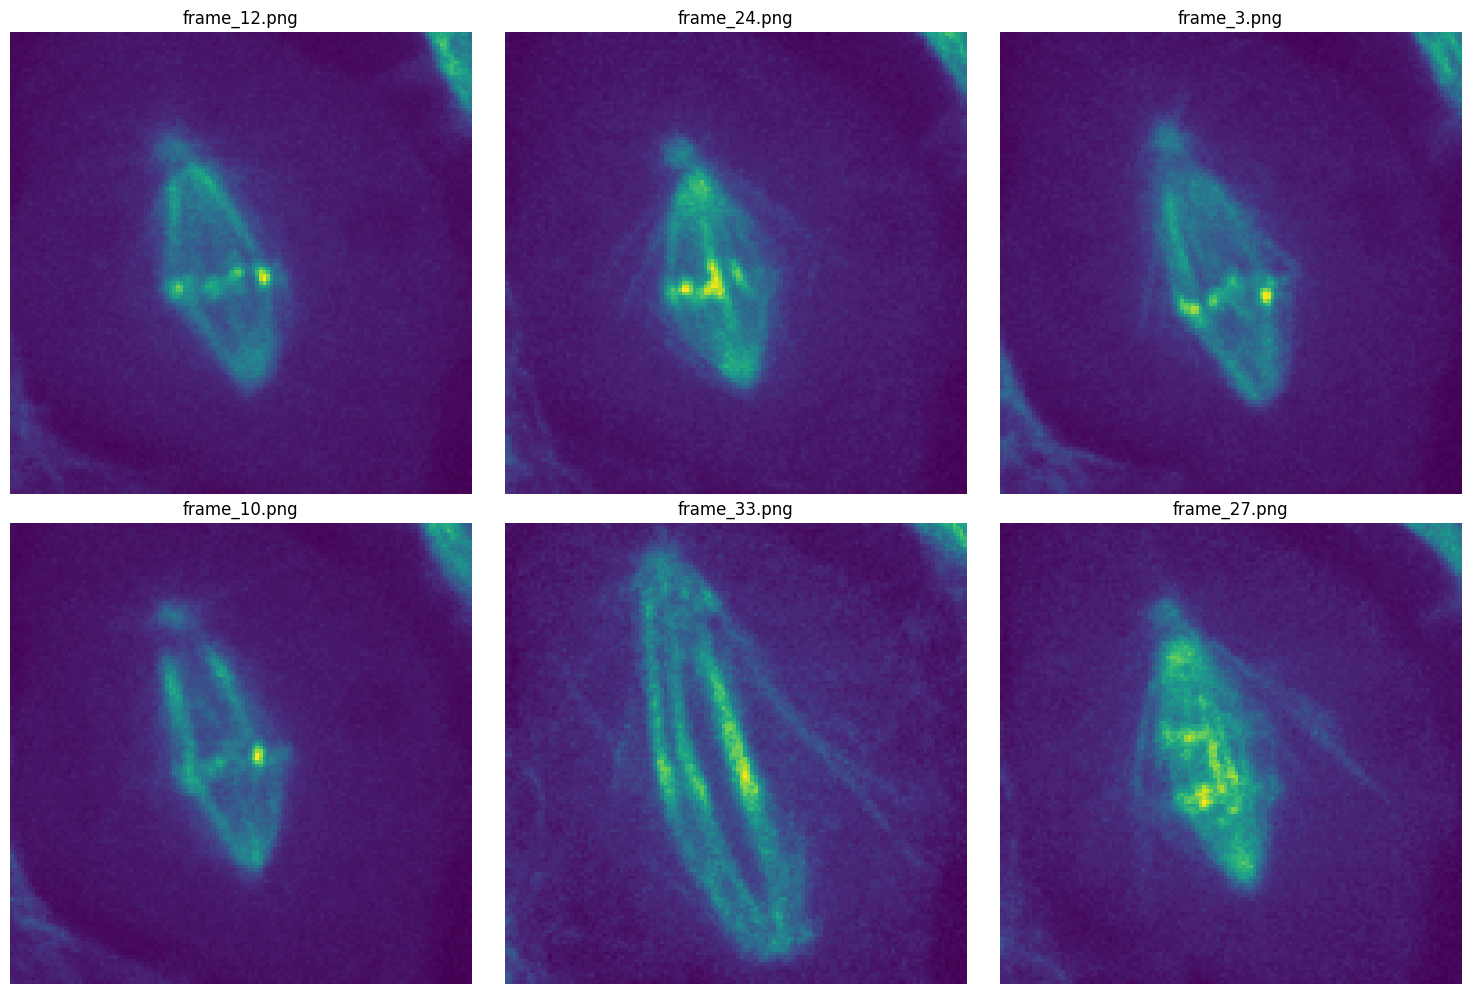

In [12]:
# Path to the 'frame' folder
folder_path = '/content/frames'

# List all files in the folder
file_list = os.listdir(folder_path)

# Randomly select 6 images
selected_images = random.sample(file_list, 6)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Display each image
for ax, image in zip(axes, selected_images):
    img_path = os.path.join(folder_path, image)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(image)

plt.tight_layout()
plt.show()
